In [24]:
import pandas as pd #estructuras de datos
import numpy as np #Calculo numerico y analisis de datos
import seaborn as sns # Graficos estadisticos
import matplotlib.pyplot as plt#Graficos en dos dimensiones

#librerias de modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Cargar datos
Datos = pd.read_csv('./Titanic.csv')

#Leer datos
Datos.head(50)

,Id_Pasajero,Sobrevivio,Clase_P,Genero,Edad,Num_Hermanos_Conyugue,Num_Padres_Hijos,Embarque
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
5,6,0,3,1,NaN,0,0,1
6,7,0,1,1,54.0,0,0,2
7,8,0,3,1,2.0,3,1,2
8,9,1,3,0,27.0,0,2,2
9,10,1,2,0,14.0,1,0,0


In [25]:
Datos.describe()

,Id_Pasajero,Sobrevivio,Clase_P,Genero,Edad,Num_Hermanos_Conyugue,Num_Padres_Hijos,Embarque
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

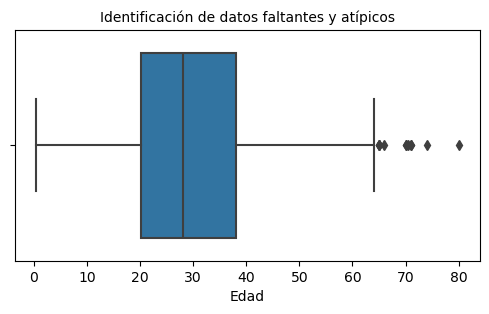

In [26]:
#Identificacion de Datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Edad'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

In [27]:
print("Cantidad de registros con cero en Edad ",Datos['Edad'].isin([0]).sum())

Cantidad de registros con cero en Edad  0


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

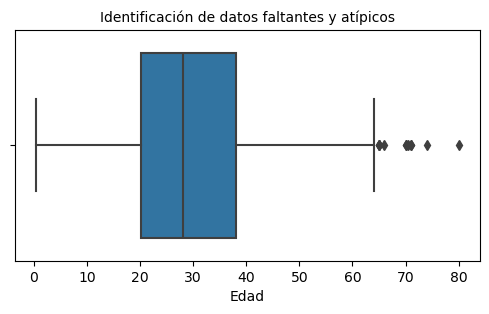

In [28]:
#Identificacion de Datos atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Edad'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

In [29]:
#Conteo de datos atipicos Edad
nivel_minimo = 20
nivel_maximo = 38
Total_Edad=((Datos['Edad']<nivel_minimo)|(Datos['Edad']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Edad))

El total de datos atipicos es 341


In [30]:
#Filtro datos atipicos Edad
Datos=Datos[(Datos['Edad']<nivel_maximo)&(Datos['Edad']>nivel_minimo)]

In [31]:
#Validar si se removieron los datos atipicos de Edad
Total_Edad=((Datos['Edad']<nivel_minimo)|(Datos['Edad']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Edad))

El total de datos atipicos es 0


In [32]:
#Revision del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id_Pasajero            347 non-null    int64  
 1   Sobrevivio             347 non-null    int64  
 2   Clase_P                347 non-null    int64  
 3   Genero                 347 non-null    int64  
 4   Edad                   347 non-null    float64
 5   Num_Hermanos_Conyugue  347 non-null    int64  
 6   Num_Padres_Hijos       347 non-null    int64  
 7   Embarque               347 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 24.4 KB


In [33]:
#punto 3
#Total de personas sobrevivientes al naufragio
# 0=no sobrevivieron 1=sobrevivieron

Datos['Sobrevivio'].value_counts()

Sobrevivio
0    210
1    137
Name: count, dtype: int64

In [34]:
Datos['Sobrevivio'].head(30)

0     0
2     1
3     1
4     0
8     1
18    0
20    0
21    1
23    1
34    0
37    0
41    0
51    0
53    1
56    1
57    0
60    0
66    1
69    0
70    0
72    0
73    0
74    1
75    0
79    1
80    0
81    1
83    0
85    1
88    1
Name: Sobrevivio, dtype: int64

In [35]:
#Punto 4
#Porcentaje de datos para entrenamiento (train) = 75% y (test) = 25%
#Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Sobrevivio',axis=1) #Se cargan los datos de train sin los datos de la columna Condicion
Y = Datos['Sobrevivio'] #Se cargan los datos de train con los datos de la id columna Sobrevivio

#La funcion train_test_split crea una division de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [36]:
print(X_train)

     Id_Pasajero  Clase_P  Genero  Edad  Num_Hermanos_Conyugue  \
4              5        3       1  35.0                      0   
843          844        3       1  34.5                      0   
206          207        3       1  32.0                      1   
588          589        3       1  22.0                      0   
227          228        3       1  20.5                      0   
..           ...      ...     ...   ...                    ...   
805          806        3       1  31.0                      0   
767          768        3       0  30.5                      0   
717          718        2       0  27.0                      0   
353          354        3       1  25.0                      1   
315          316        3       0  26.0                      0   

     Num_Padres_Hijos  Embarque  
4                   0         2  
843                 0         0  
206                 0         2  
588                 0         2  
227                 0         2  
.. 

In [37]:
print(Y_train)

4      0
843    0
206    0
588    0
227    0
      ..
805    0
767    0
717    1
353    0
315    1
Name: Sobrevivio, Length: 260, dtype: int64


In [38]:
#Punto 5
#Construir el modelo de regresión logistico
    
modelo_regresion = LogisticRegression(solver = "liblinear") #Libreria para problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train, Y_train)

#Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) #Predice valores a partir del conjunto de datos de validacion


In [39]:
print(Y_test)

794    0
290    1
724    1
117    0
216    1
      ..
405    0
328    1
443    1
230    1
79     1
Name: Sobrevivio, Length: 87, dtype: int64


In [40]:
print(Prediccion)

[0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 1]


In [41]:
#Punto 6
#Desempeño del modelo de regresion

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        53
           1       0.81      0.65      0.72        34

    accuracy                           0.80        87
   macro avg       0.81      0.78      0.79        87
weighted avg       0.81      0.80      0.80        87



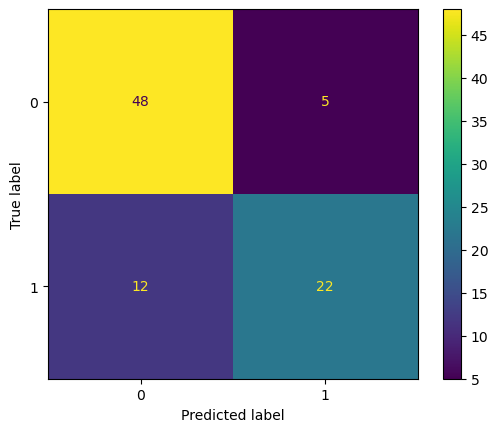

In [42]:
#Punto 7
#Matrix de confusion del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

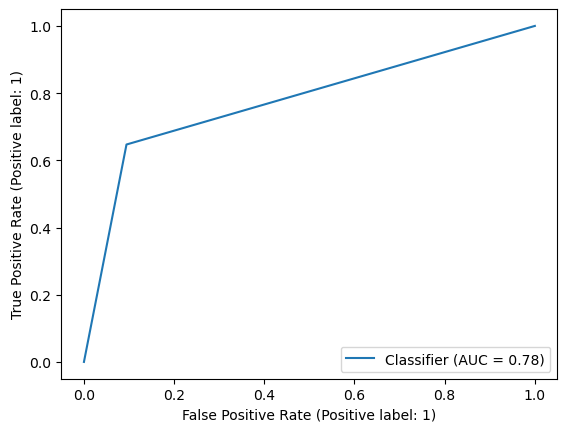

In [43]:
#Curva de precision del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

In [44]:
Datos.describe()

,Id_Pasajero,Sobrevivio,Clase_P,Genero,Edad,Num_Hermanos_Conyugue,Num_Padres_Hijos,Embarque
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,444.654179,0.394813,2.299712,0.657061,28.231988,0.340058,0.244957,1.628242
std,252.944672,0.489516,0.795271,0.475377,4.744962,0.603155,0.622736,0.758465
min,1.000000,0.000000,1.000000,0.000000,20.500000,0.000000,0.000000,0.000000
25%,233.500000,0.000000,2.000000,0.000000,24.000000,0.000000,0.000000,2.000000
50%,430.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,2.000000
75%,658.500000,1.000000,3.000000,1.000000,32.000000,1.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,37.000000,3.000000,4.000000,2.000000
